# Importing the all required libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Data preprocessing 

Load the data as the data frame named "data".

In [2]:
data=pd.read_csv(r"C:\Users\Tusha\Downloads\DS1_C5_S3_BazilHousing_Data_Hackathon.csv")
data.head()

city  area  rooms  bathroom  parking spaces  floor     animal  \
0     São Paulo    70      2         1               1      7      acept   
1     São Paulo   320      4         4               0     20      acept   
2  Porto Alegre    80      1         1               1      6      acept   
3  Porto Alegre    51      2         1               0      2      acept   
4     São Paulo    25      1         1               0      1  not acept   

       furniture  hoa (R$)  rent amount (R$)  property tax (R$)  \
0      furnished      2065              3300                211   
1  not furnished      1200              4960               1750   
2  not furnished      1000              2800                  0   
3  not furnished       270              1112                 22   
4  not furnished         0               800                 25   

   fire insurance (R$)  total (R$)  
0                   42        5618  
1                   63        7973  
2                   41        3841  
3                   17        1421  
4                   11         836

Check if there is any null values in each columns

In [3]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [4]:
data.shape

(10692, 13)

Seperating the categorical and non categorical columns 

In [5]:
categorical=[] # Empty List to store the categorical column name 
continous=[] # Empty List to store the numerical/continuous column name 
for col in data.columns:
    if data[col].nunique()<=30:
        categorical.append(col)
    else:
        continous.append(col)

In [6]:
categorical=data.loc[:, categorical]
categorical

city  rooms  bathroom  parking spaces     animal  \
0           São Paulo      2         1               1      acept   
1           São Paulo      4         4               0      acept   
2        Porto Alegre      1         1               1      acept   
3        Porto Alegre      2         1               0      acept   
4           São Paulo      1         1               0  not acept   
...               ...    ...       ...             ...        ...   
10687    Porto Alegre      2         1               1  not acept   
10688       São Paulo      4         4               4      acept   
10689  Rio de Janeiro      3         3               0  not acept   
10690  Rio de Janeiro      2         2               2      acept   
10691       São Paulo      2         1               0      acept   

           furniture  
0          furnished  
1      not furnished  
2      not furnished  
3      not furnished  
4      not furnished  
...              ...  
10687      furnished  
10688  not furnished  
10689      furnished  
10690      furnished  
10691  not furnished  

[10692 rows x 6 columns]

In [7]:
continous=data.loc[:, continous]
continous

area  floor  hoa (R$)  rent amount (R$)  property tax (R$)  \
0        70      7      2065              3300                211   
1       320     20      1200              4960               1750   
2        80      6      1000              2800                  0   
3        51      2       270              1112                 22   
4        25      1         0               800                 25   
...     ...    ...       ...               ...                ...   
10687    63      5       402              1478                 24   
10688   285     17      3100             15000                973   
10689    70      8       980              6000                332   
10690   120      8      1585             12000                279   
10691    80      0         0              1400                165   

       fire insurance (R$)  total (R$)  
0                       42        5618  
1                       63        7973  
2                       41        3841  
3                       17        1421  
4                       11         836  
...                    ...         ...  
10687                   22        1926  
10688                  191       19260  
10689                   78        7390  
10690                  155       14020  
10691                   22        1587  

[10692 rows x 7 columns]

In [8]:
print(categorical.columns)
print(continous.columns)

Index(['city', 'rooms', 'bathroom', 'parking spaces', 'animal', 'furniture'], dtype='object')
Index(['area', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')


Outlier Treatment: Replace the outliers from the mean values

In [9]:
for i in continous.columns:
    q1=data[i].quantile(.25)
    q3=data[i].quantile(.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    mean=data[i].mean()
    ind_lo=data[data[i]<lf].index
    for k in ind_lo:
        data.loc[k, i]=mean
    ind_uo=data[data[i]>uf].index
    for j in ind_uo:
        data.loc[j, i]=mean
    

# Univeriate Analysis for categorical columns

In [10]:
for col in categorical.columns:
    print(f"The values in {col} is {categorical[col].unique()}")

The values in city is ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
The values in rooms is [ 2  4  1  3  7  5  8  6 10 13  9]
The values in bathroom is [ 1  4  3  2  6  5  7  9  8 10]
The values in parking spaces is [ 1  0  7  4  2  6  3  8  5 10 12]
The values in animal is ['acept' 'not acept']
The values in furniture is ['furnished' 'not furnished']


Count of houses in the city 

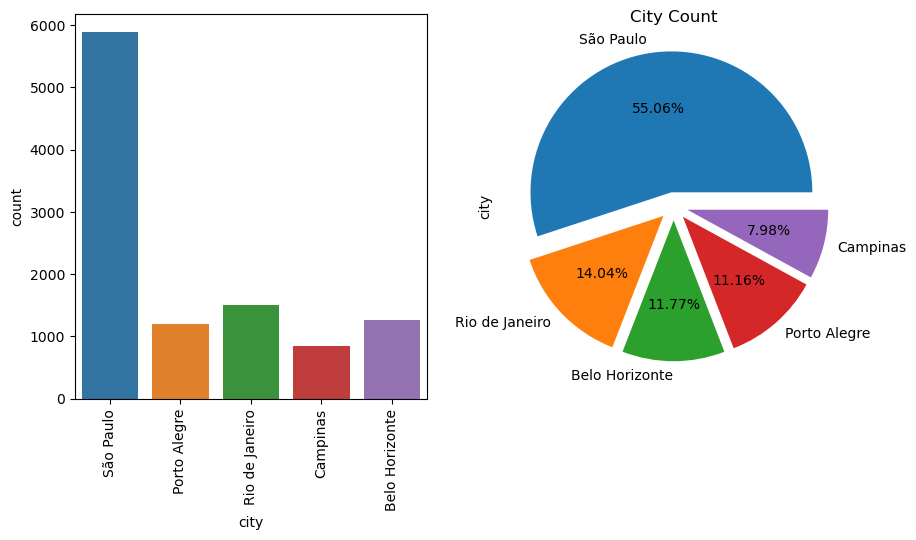

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

a=sb.countplot(x=categorical["city"],data=categorical, ax=ax[0])
a.set_xticklabels(a.get_xticklabels(), rotation=90)
plt.title("City Count")
categorical['city'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1], explode=[.1,0.1,0.1,0.1,0.1])
plt.show()

Count based on rooms  

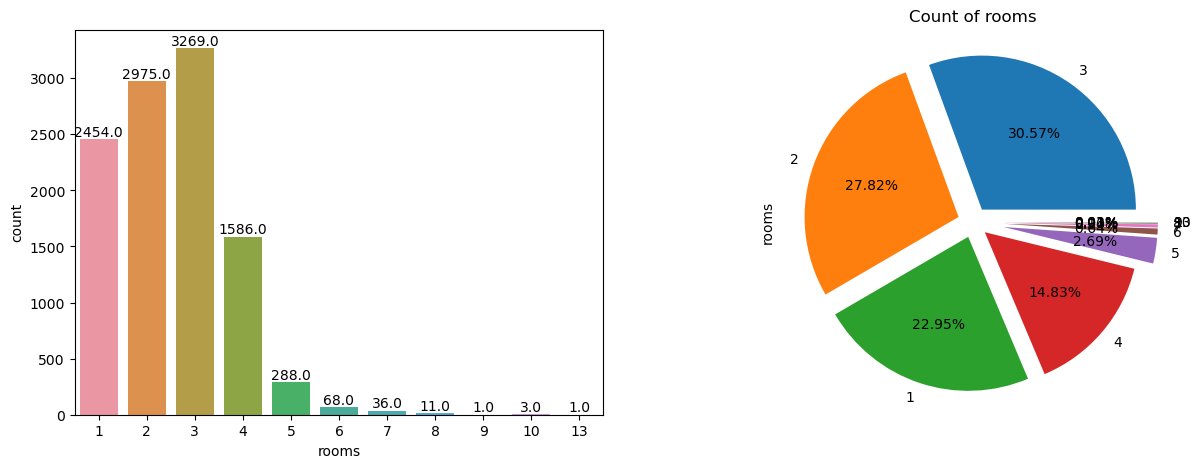

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a=sb.countplot(x=categorical["rooms"],data=categorical, ax=ax[0])
#a.set_xticklabels(a.get_xticklabels(), rotation=90)
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =f"{bar.get_height()}"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )
plt.title("Count of rooms")
categorical['rooms'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1], 
                                            explode= [ 0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2])
plt.show()

# Interpretation: Maximum number of the houses are 3 rooms houses because most family preferred the 3 rooms houses 

Count based on number of Bathrooms

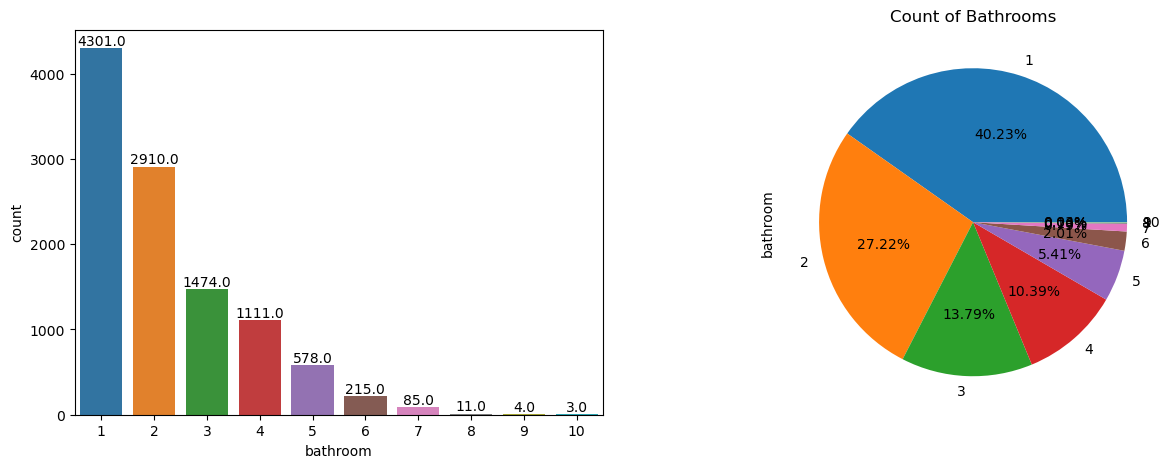

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a=sb.countplot(x=categorical["bathroom"],data=categorical, ax=ax[0])
#a.set_xticklabels(a.get_xticklabels(), rotation=90)
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =f"{bar.get_height()}"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )
plt.title("Count of Bathrooms")
categorical['bathroom'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

Count based on parking Spaces 

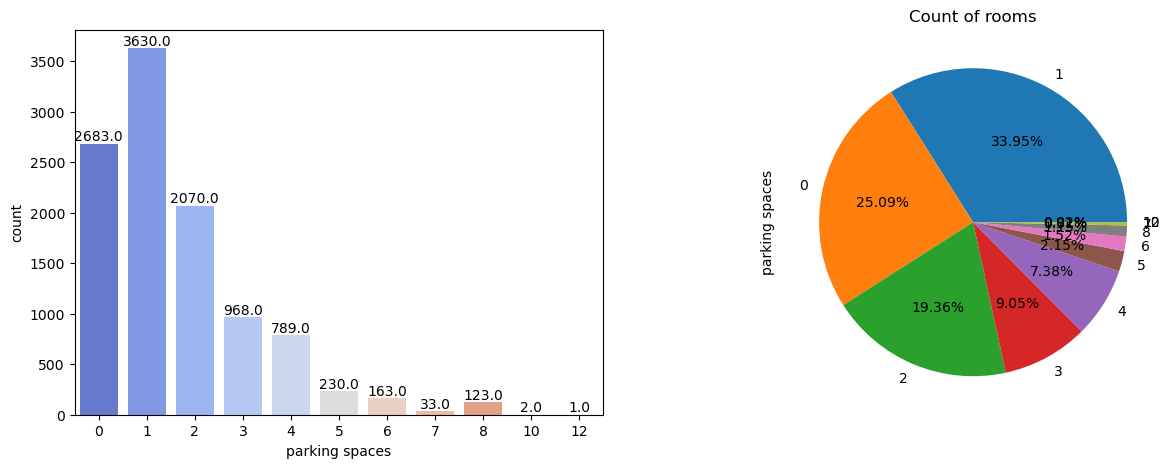

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a=sb.countplot(x=categorical["parking spaces"],data=categorical, ax=ax[0], palette="coolwarm")
#a.set_xticklabels(a.get_xticklabels(), rotation=90)
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =f"{bar.get_height()}"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )
plt.title("Count of rooms")
categorical['parking spaces'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

Count based on animals are allowed or not 

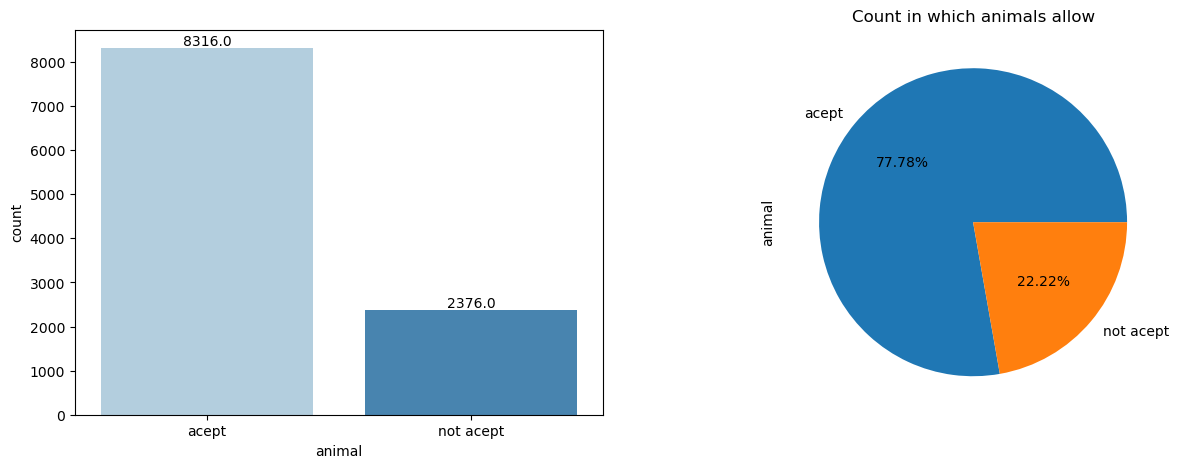

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a=sb.countplot(x=categorical["animal"],data=categorical, ax=ax[0], palette="Blues")
#a.set_xticklabels(a.get_xticklabels(), rotation=90)
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =f"{bar.get_height()}"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )
plt.title("Count in which animals allow")
categorical['animal'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

# Interpretation : Most of the houses accept the pets. 

Count based the house have furnished or not furnished

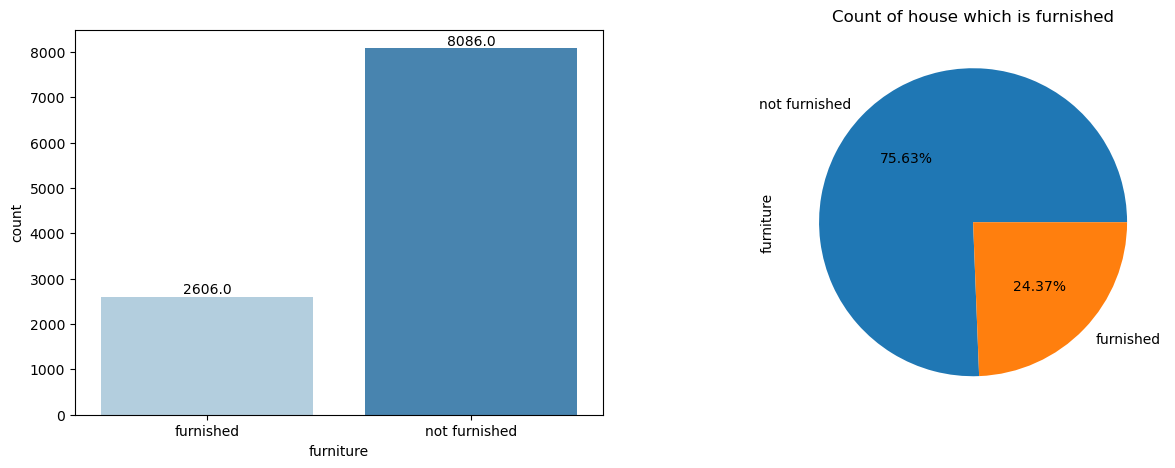

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

a=sb.countplot(x=categorical["furniture"],data=categorical, ax=ax[0], palette="Blues")
#a.set_xticklabels(a.get_xticklabels(), rotation=90)
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =f"{bar.get_height()}"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )
plt.title("Count of house which is furnished")
categorical['furniture'].value_counts().plot.pie(autopct='%.2f%%', ax=ax[1])
plt.show()

# Interpretation : most of the houses are not furnished 

# Univeriate analysis of Numerical Columns 

In [17]:
print(continous.columns)

Index(['area', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')


# Area Analysis

<Axes: ylabel='Density'>

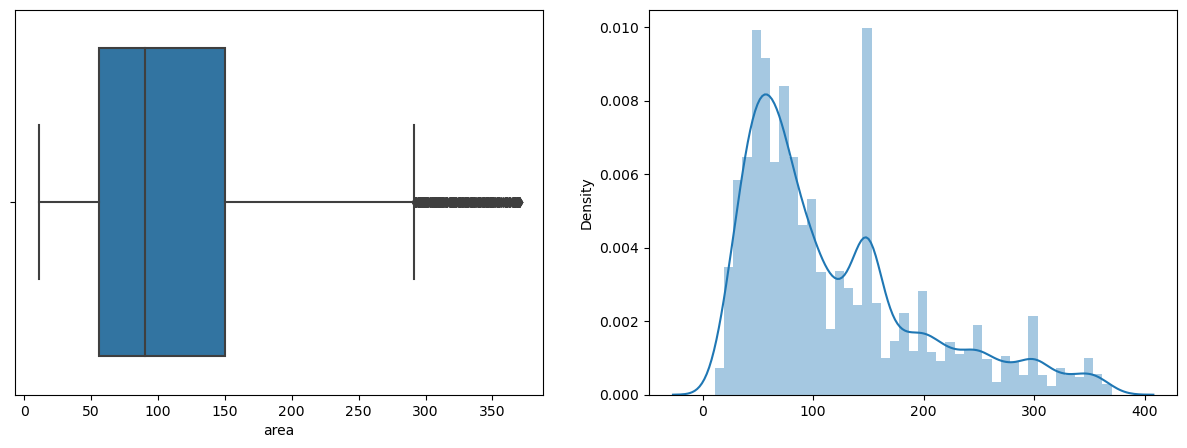

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=data["area"], ax=ax[0])
sb.distplot(x=data["area"], ax=ax[1], kde=True, hist=True)


# Int. :- 50% of the houses have the area 50-150 sq meter.

# Floor Analysis 

<Axes: ylabel='Density'>

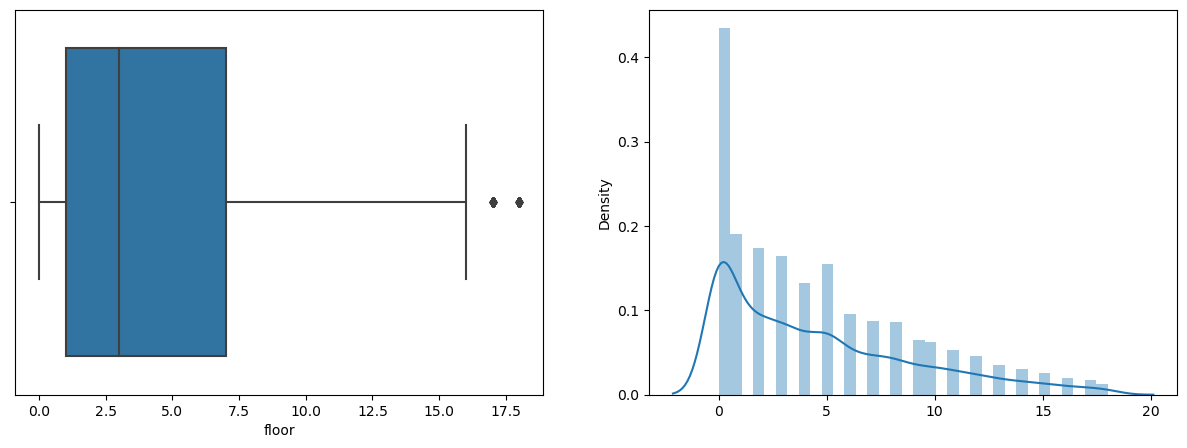

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=data["floor"], ax=ax[0])
sb.distplot(x=data["floor"], ax=ax[1], kde=True, hist=True)

# Interpretation: 1-4 or 5 floor houses are most common 

# Rent Amount Analysis 

<Axes: ylabel='Density'>

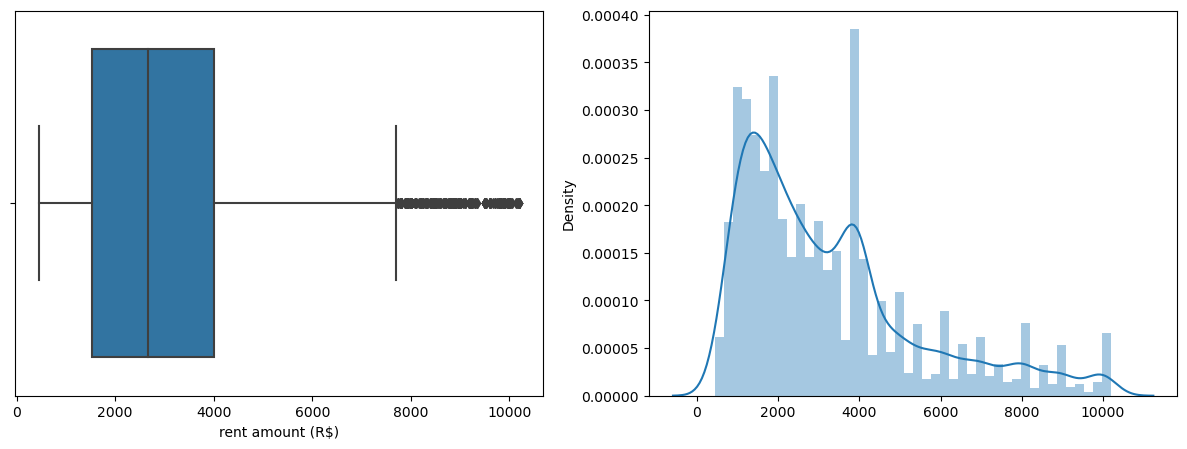

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=data["rent amount (R$)"], ax=ax[0])
sb.distplot(x=data["rent amount (R$)"], ax=ax[1], kde=True, hist=True)

# Total Rent Analysis

<Axes: ylabel='Density'>

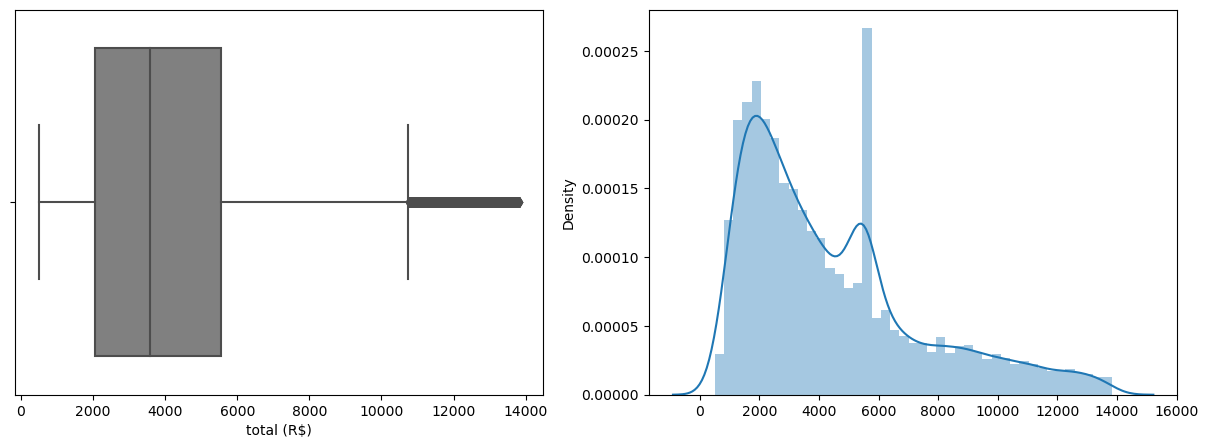

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sb.boxplot(x=data["total (R$)"], ax=ax[0], palette="gray")
sb.distplot(x=data["total (R$)"], ax=ax[1], kde=True)

# Int: Total rent of the house lies between 2000-6000 (R Dollar)

# Level 2: Bivariate and Multivariate Analysis

City wise total rent of houses

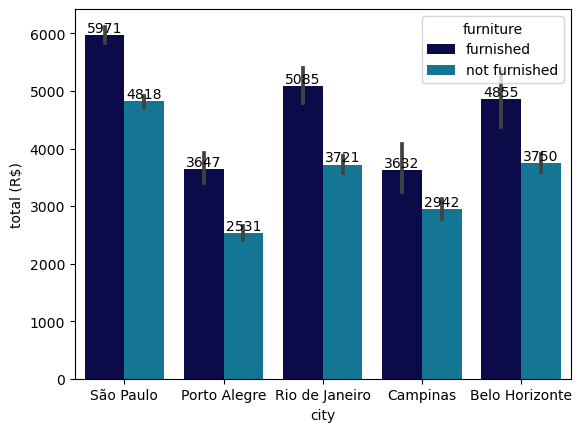

In [24]:
a=sb.barplot(x=data["city"], y=data["total (R$)"], hue=data["furniture"], palette="ocean")
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =f"{round(bar.get_height())}"          # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )

# Interpretation : Porto Alegre and Campinas are the cheapest city in the Brazil having low total rent

City wise total rent based on number of rooms

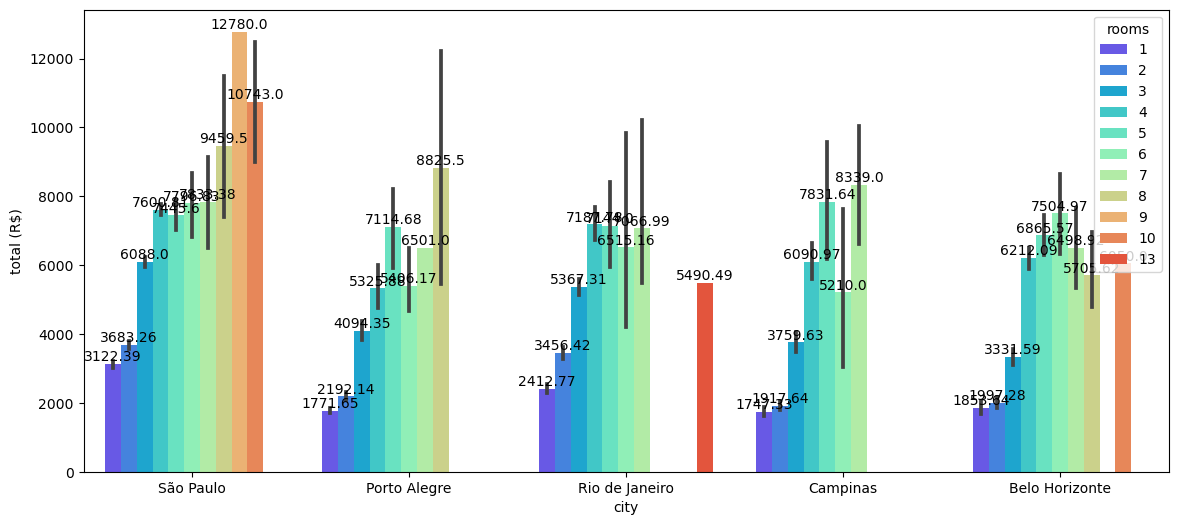

In [25]:
plt.figure(figsize=(14,6))
a=sb.barplot(x=data["city"], y=data["total (R$)"], hue=data["rooms"], palette="rainbow")
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =round(bar.get_height(), 2)     # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )

# Interpretation : 2-3 rooms are affordable price in Porto Algre and Campinas 

City wise total rent based on furniture settings

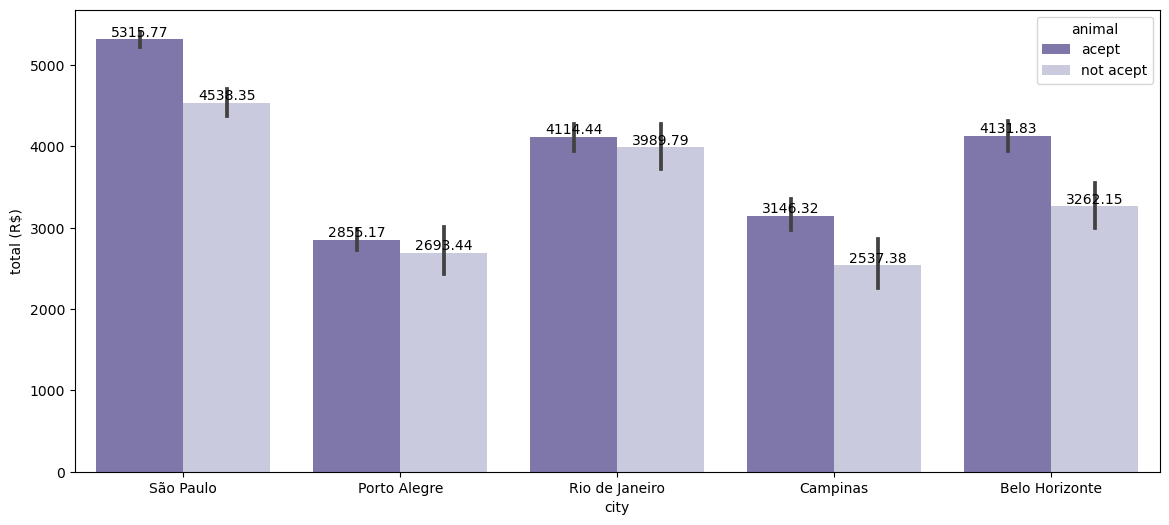

In [30]:
plt.figure(figsize=(14,6))
a=sb.barplot(x=data["city"], y=data["total (R$)"], hue=data["animal"], palette="Purples_r")
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =round(bar.get_height(), 2)     # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )

Room wise total rent of the house 

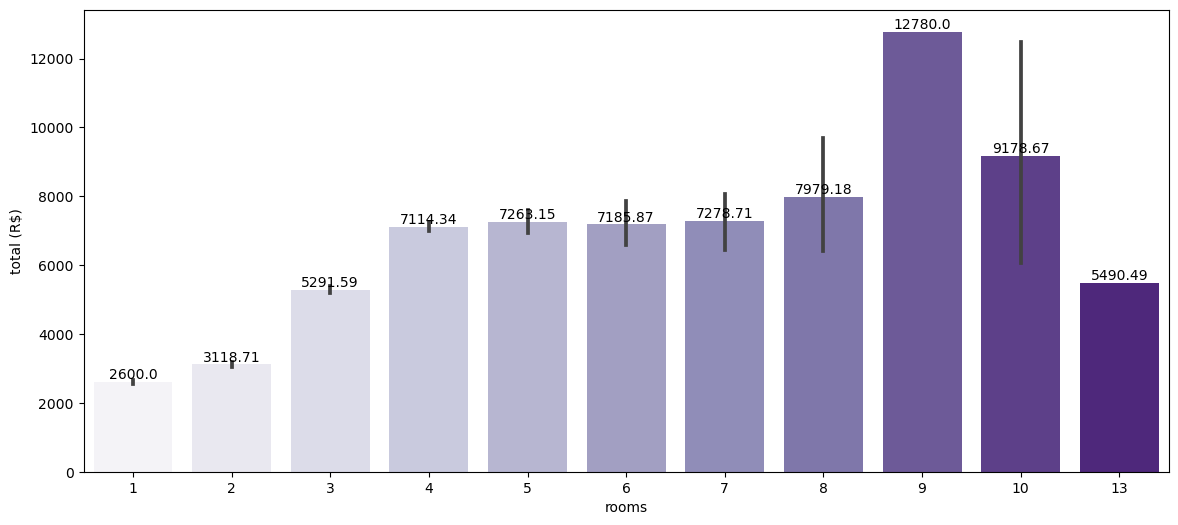

In [29]:
plt.figure(figsize=(14,6))
a=sb.barplot(x=data["rooms"], y=data["total (R$)"], palette="Purples")
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =round(bar.get_height(), 2)     # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )

Total rent based on furniture setting

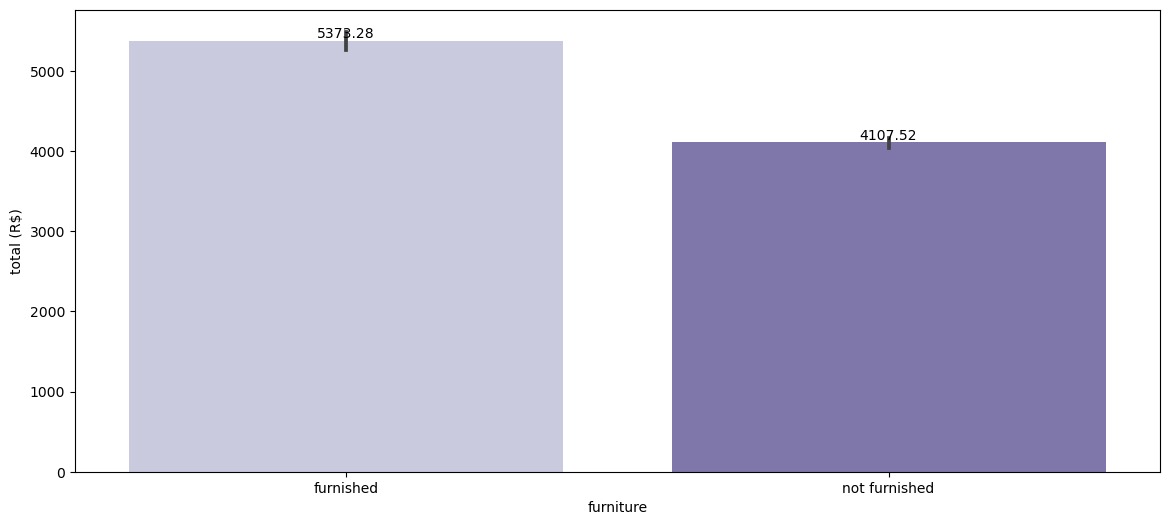

In [33]:
plt.figure(figsize=(14,6))
a=sb.barplot(x=data["furniture"], y=data["total (R$)"], palette="Purples")
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =round(bar.get_height(), 2)     # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                          # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )

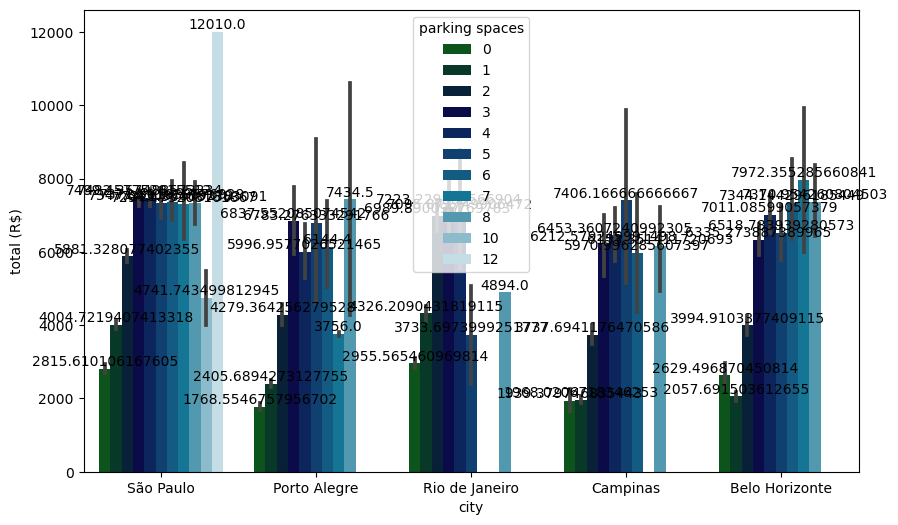

In [38]:
plt.figure(figsize=(10,6))
a=sb.barplot(x=data["city"], y=data["total (R$)"], hue=data["parking spaces"], palette="ocean")
for bar in a.patches:                                              # ax.patches returns the rectange object from matplotlib
    count =bar.get_height()         # first it calculate the bar height and then dividing by the number of rows in data(to calculate percentage) 
                                                                    # and multiply with 100 to get the percentage and rounding of by 2 numbers.  
    x = bar.get_x() + bar.get_width() /2                            # get_x: returns the left corrdinate of the rectange, get_width: returns width of rectagle
    y = bar.get_height()                                            # get_height: returns height of rectange
    a.annotate(count, (x, y), va = "bottom", ha ="center" )

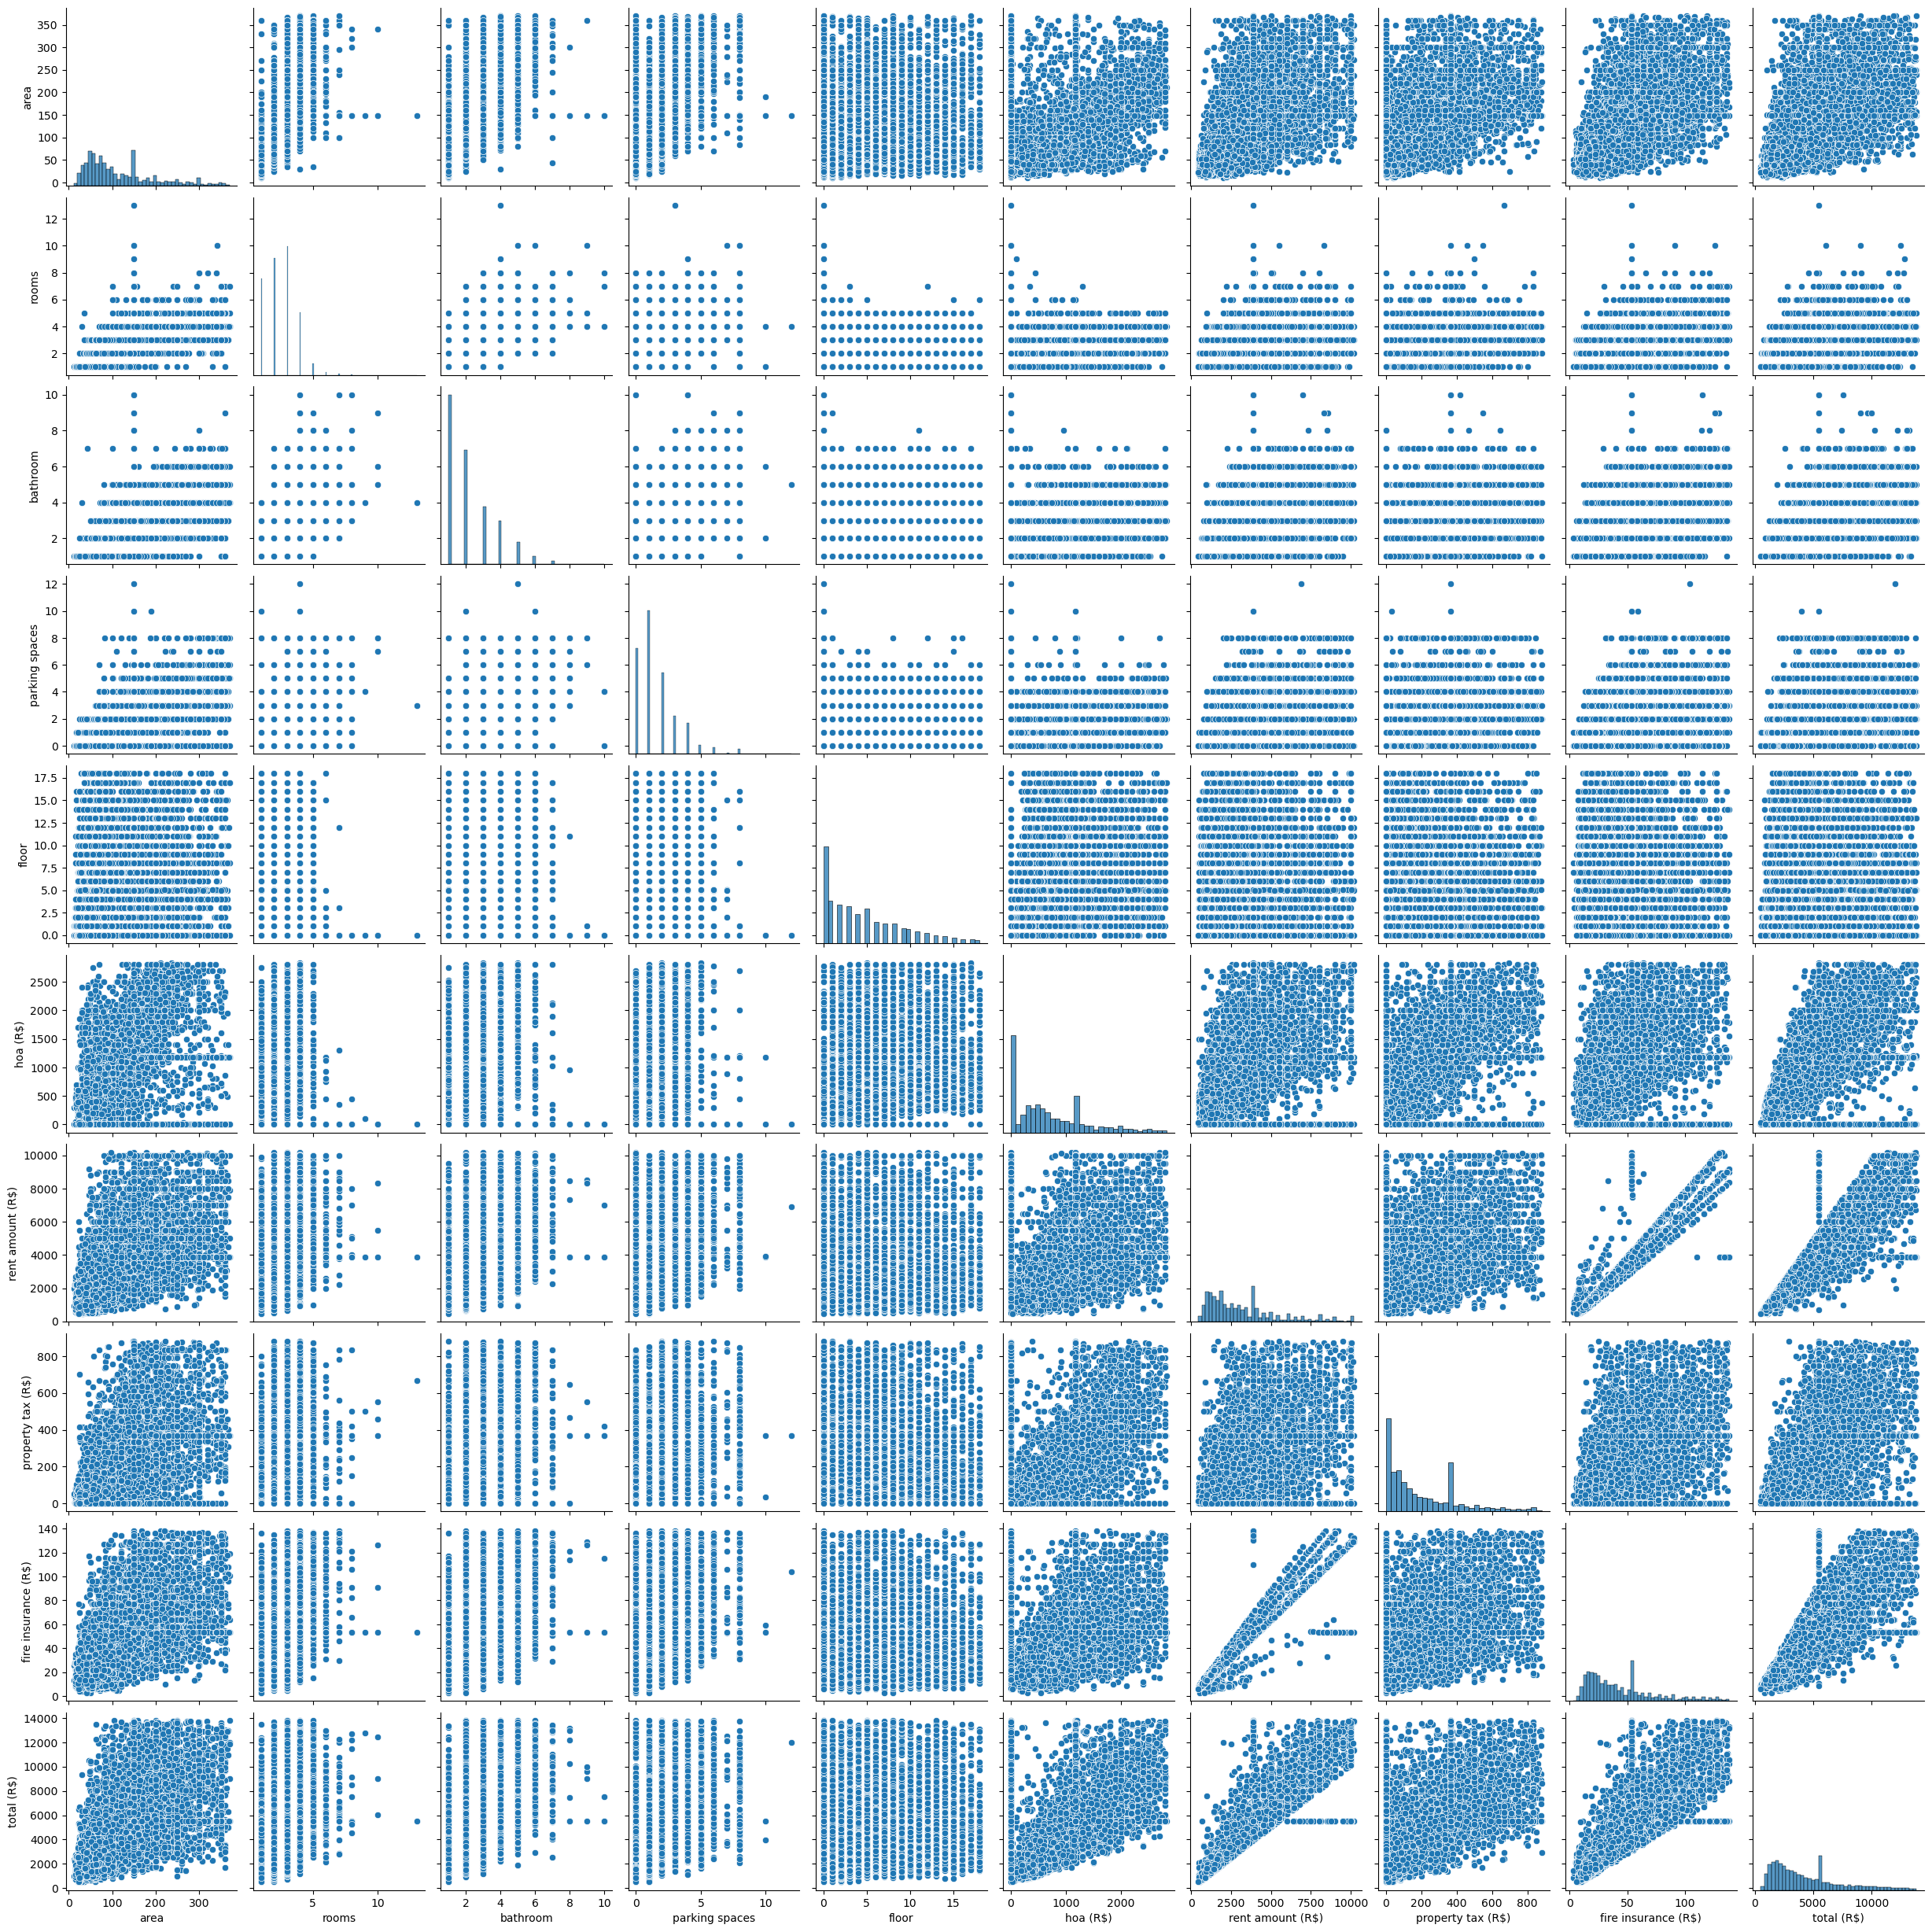

In [34]:
sb.pairplot(data)

Interpretation:
1. As per the Analysis, cities Porto Alegre and Campinas are two cheaper cities having reasonable total rent. 
2. 3 room house are most common that have the highest number of houses having 3 rooms 
3. More than 50% houses have the 1 Parking Space that is suitable for the bachelors and family  have the at least one vehicle
4. More than  50% house accept the pats. 
5. A good number of houses are not furnished that is suitable for the bachelors. 
6. 4-5 floor house are mpst common among the people. 
7. If someone want cheap 3 rooms set they can refer to Porto Alegre and Campinas. But if they required 7-10 room set for big size Family they can afford it to Belo Horizonte. 
9. The total rent of 4, 5, 6, 7 rooms of house have very small difference. 
10. In Porto Alegre and Campinas, most of the houses have less rent and accepted the pats and animals. 
11. Best choice for the bachelors are Porto Alegre and Campinas. 
12. For mid size family they can afford 2-3 rooms in Sau Paulo and if they require more rooms the best choice will be Porto Alegre and Campinas and Belo Horizonte with more parking space. 
13. for the big size Family the if the rent is not matter they can have the rooms on Sau Paolo and Rio de jeniore. Otherwise they can have the 7-8 rooms set in Belo Horizonte.
